In [34]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
users = [{
    'id': 0, 
    'name': "Hero"
},{
    'id': 1, 
    'name': "Dunn"
},{
    'id': 2, 
    'name': "Sue"
},{
    'id': 3, 
    'name': "Chi"
},{
    'id': 4, 
    'name': "Thor"
},{
    'id': 5, 
    'name': "Clive"
},{
    'id': 6, 
    'name': "Hicks"
},{
    'id': 7, 
    'name': "Devin"
},{
    'id': 8, 
    'name': "Kate"
},{
    'id': 9, 
    'name': "Klein"
}]

In [3]:
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [4]:
friendships = {user['id']: [] for user in users}

In [5]:
for i, j in friendship_pairs:
    friendships[i].append(j)
    friendships[j].append(i)

In [6]:
def number_of_friends(user):
    user_id = user['id']
    friends_ids = friendships[user_id]
    return len(friends_ids)

In [7]:
total_connections = sum(number_of_friends(user) for user in users)

In [8]:
total_connections

24

In [9]:
num_users = len(users)

In [10]:
avg_connections = total_connections/ num_users

In [11]:
avg_connections

2.4

In [12]:
num_friends_by_id = [(user['id'] , number_of_friends(user)) for user in users]

In [13]:
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [17]:
num_friends_by_id.sort(key = lambda x: x[1], reverse = True)

In [18]:
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [19]:
def foaf_ids_bad(user):
    return [foaf_id for friend_id in friendships[user['id']] for foaf_id in friendships[friend_id]]

In [21]:
foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [22]:
from collections import Counter

def friends_of_friends(user):
    user_id = user['id']
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]
        for foaf_id in friendships[friend_id]
        if foaf_id != user_id
        and foaf_id not in friendships[user_id]
    )

In [23]:
friends_of_friends(users[3])

Counter({0: 2, 5: 1})

In [24]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"), (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [26]:
def data_scientists_who_like(target_interest): 
    return [user_id for user_id, user_interest in interests if user_interest == target_interest]

In [29]:
from collections import defaultdict
user_ids_by_interest = defaultdict(list) 
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

In [30]:
interests_by_user_id = defaultdict(list) 
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [31]:
def most_common_interests_with(user): 
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest] 
        if interested_user_id != user["id"]
    )

In [32]:
salaries_and_tenures = [
    (83000, 8.7), 
    (88000, 8.1),
    (48000, 0.7),
    (76000, 6),
    (69000, 6.5),
    (76000, 7.5),
    (60000, 2.5),
    (83000, 10),
    (48000, 1.9),
    (63000, 4.2)
]

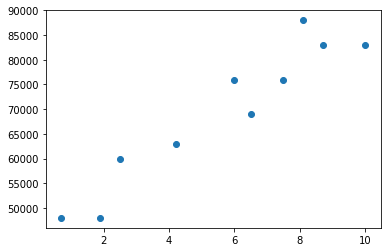

In [38]:
x_val = [x[0] for x in salaries_and_tenures]
y_val = [x[1] for x in salaries_and_tenures]

plt.scatter(y_val,x_val)

In [39]:
salary_by_tenure = defaultdict(list)
for salary, tenure in salaries_and_tenures: 
    salary_by_tenure[tenure].append(salary)
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [40]:
average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [41]:
def tenure_bucket(tenure): 
    if tenure < 2:
        return "less than two" 
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

In [43]:
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure) 
    salary_by_tenure_bucket[bucket].append(salary)

In [45]:
average_salary_by_bucket = {
    tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [46]:
average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

In [47]:
def predict_paid_or_unpaid(years_experience): 
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid" 
    else:
        return "paid"

In [48]:
words_and_counts = Counter(
    word
    for user, interest in interests
    for word in interest.lower().split()
)

In [51]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print (word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
